In [1]:
# Evaluating the Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from networkx.algorithms.bipartite.basic import color

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,139.0,3.549977e+07,1.095121e+08,277315.000000,3.752776e+06,9.705130e+06,2.791973e+07,1.197070e+09
fertility,139.0,3.005108e+00,1.615354e+00,1.280000,1.810000e+00,2.410000e+00,4.095000e+00,7.590000e+00
HIV,139.0,1.915612e+00,4.408974e+00,0.060000,1.000000e-01,4.000000e-01,1.300000e+00,2.590000e+01
CO2,139.0,4.459874e+00,6.268349e+00,0.008618,4.961900e-01,2.223796e+00,6.589156e+00,4.870206e+01
BMI_male,139.0,2.462305e+01,2.209368e+00,20.397420,2.244814e+01,2.515699e+01,2.649757e+01,2.845698e+01
GDP,139.0,1.663878e+04,1.920730e+04,588.000000,2.899000e+03,9.938000e+03,2.327850e+04,1.260760e+05
BMI_female,139.0,1.267019e+02,4.471997e+00,117.375500,1.232322e+02,1.265196e+02,1.302759e+02,1.354920e+02
life,139.0,6.960288e+01,9.122189e+00,45.200000,6.220000e+01,7.200000e+01,7.685000e+01,8.260000e+01
child_mortality,139.0,4.509712e+01,4.572467e+01,2.700000,8.100000e+00,2.400000e+01,7.420000e+01,1.920000e+02


In [6]:
# Check for missing values

In [7]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
dtype: int64

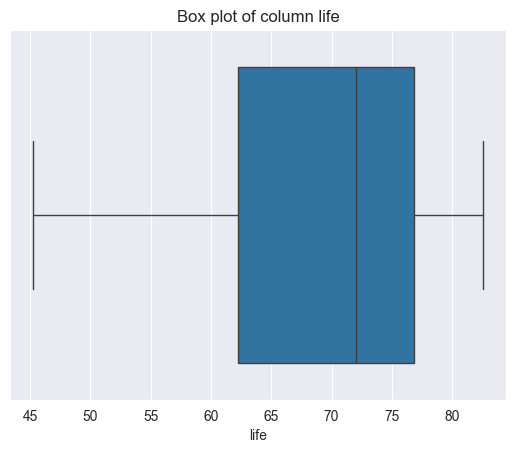

In [8]:
sns.boxplot(x='life', data=df)
plt.title("Box plot of column life")
plt.show()

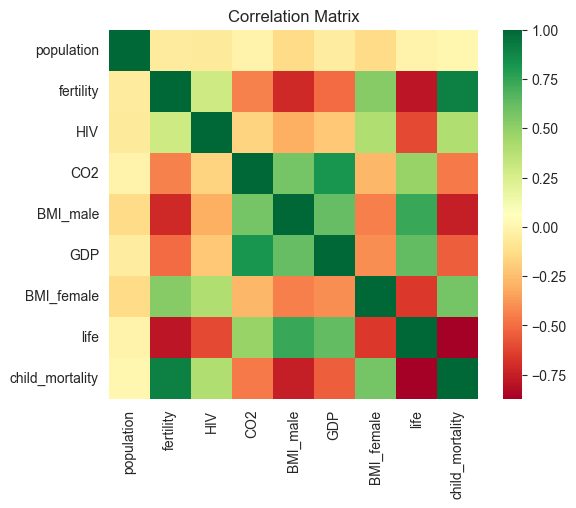

In [9]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature matrix and target vector
X = df.drop(columns=['life'])
y = df['life']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the linear regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Predict the target vector (unseen values)
y_pred = lin_reg.predict(X_test)
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Linear Regression RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Linear Regression R^2 Score: 0.838046873143006
Linear Regression RMSE Score: 3.247601080037021


In [11]:
from sklearn.model_selection import cross_val_score

regression = LinearRegression()

# Perform 3-fold cross validation
cv_scores_3 = cross_val_score(regression, X, y, cv=3, scoring='r2')
print(f"Mean R^2 Scores (3 folds): {np.mean(cv_scores_3)}")
print(f"Standard Deviation (3 folds): {np.std(cv_scores_3)}")

# Perform 10-fold cross validation
cv_scores_10 = cross_val_score(regression, X, y, cv=10, scoring='r2')
print(f"\nMean R^2 Scores (10 folds): {np.mean(cv_scores_10)}")
print(f"Standard Deviation (10 folds): {np.std(cv_scores_10)}")

Mean R^2 Scores (3 folds): 0.8718712782622111
Standard Deviation (3 folds): 0.026122859508141732

Mean R^2 Scores (10 folds): 0.8436128620131187
Standard Deviation (10 folds): 0.07792895984069316


In [12]:
cv_scores_3

array([0.83699524, 0.87875694, 0.89986165])

In [13]:
cv_scores_10

array([0.73564531, 0.7988102 , 0.82780762, 0.86331179, 0.74902465,
       0.94417158, 0.83259108, 0.78157196, 0.95777479, 0.94541964])

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Ridge and Lasso models
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.7)

# Fit the models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Predict the target vector (unseen values)
y_ridge_pred = ridge.predict(X_test_scaled)
y_lasso_pred = lasso.predict(X_test_scaled)

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}: Evaluation")
    print(f"{model_name} R^2 Score: {r2_score(y_true, y_pred)}:.4f")
    print(f"{model_name} RMSE Score: {np.sqrt(mean_squared_error(y_true, y_pred))}:.4f")

In [16]:
evaluate_model(y_test, y_ridge_pred, "Ridge")


Ridge: Evaluation
Ridge R^2 Score: 0.8381069389537492:.4f
Ridge RMSE Score: 3.246998782674671:.4f


In [17]:
evaluate_model(y_test, y_lasso_pred, "Lasso")


Lasso: Evaluation
Lasso R^2 Score: 0.8615485396155278:.4f
Lasso RMSE Score: 3.002733429252285:.4f


In [18]:
print(f"Ridge Coefficients: {ridge.coef_}")
print(f"\nLasso Coefficients: {lasso.coef_}")

Ridge Coefficients: [-0.2619121  -0.53016829 -3.22911771 -0.7069034   1.09521182  2.19506708
 -1.14105182 -3.96684963]

Lasso Coefficients: [-0.         -0.         -2.74320938  0.          0.71951437  1.53909968
 -0.87276902 -4.40420776]


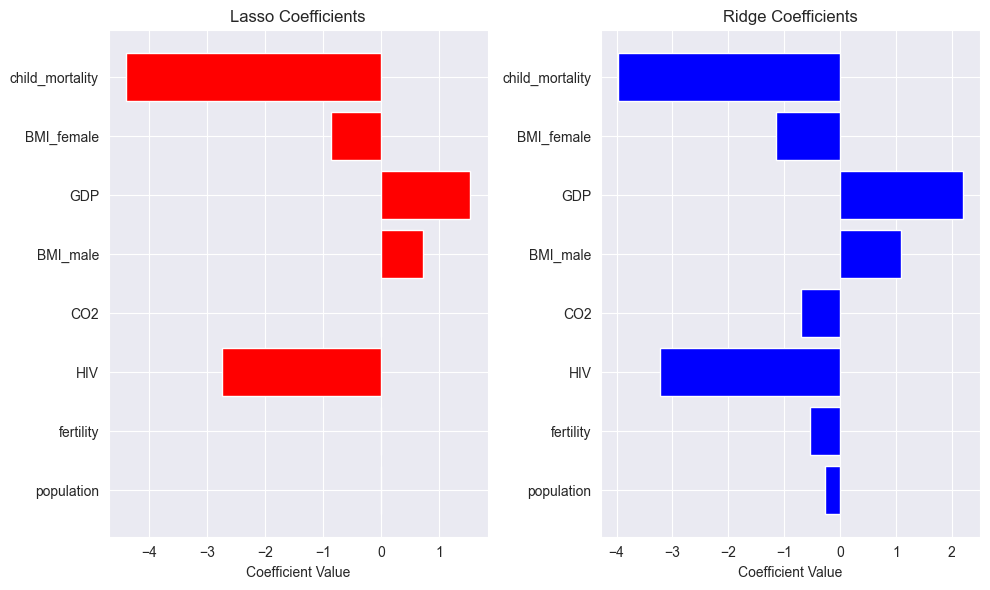

In [21]:
# Vizualizing the Coefficients

feature_names = X.columns
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.barh(feature_names, lasso.coef_, color='red')
plt.title("Lasso Coefficients")
plt.xlabel("Coefficient Value")

plt.subplot(1, 2, 2)
plt.barh(feature_names, ridge.coef_, color='blue')
plt.title("Ridge Coefficients")
plt.xlabel("Coefficient Value")

plt.tight_layout()
plt.show()